# Laboratorio 02 - Support Vector Machines y Modelos basados en árboles
Coding Bootcamps ESPOL, Machine Learning and Predictions, Cohorte II

Instructores: Galo Castillo López

GRUPO 2: VIVIANA HUACHIZACA - JOSHELYN INTRIAGO

En este laboratorio implementaremos modelos SVM y modelos basados en árboles, utilizando `scikit-learn`, para predecir si un estudiante reprobará un curso basado en su información personal e histórica. La variable objetivo corresponde resultado final del curso (aprueba o reprueba). Lo que nos interesa es construir es un modelo que detecta a tiempo quiénes reprobarán el curso para tomar medidas anticipadas.

La consigna en este laboratorio es contestar todos los **TODOs** a lo largo del notebook.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./data_calificaciones.csv')

In [ ]:
df.head()

,edad,ingresos_familiares,asistencia,horas_estudio,tiempo_redes_sociales,calificacion_final
0,19.0,75000.0,93.0,12.0,NaN,aprueba
1,21.0,60000.0,86.0,3.0,15.0,reprueba
2,19.0,40000.0,80.0,2.0,13.0,reprueba
3,21.0,40000.0,75.0,5.0,6.0,aprueba
4,22.0,50000.0,72.0,2.0,10.0,reprueba


* edad: Edad del estudiante
* ingresos_familiares: Ingresos familiares del hogar del estudiante
* asistencia: Porcentaje de asistencia a clases
* horas_estudio: Horas de estudio a la semana
* tiempo_redes_sociales: Horas de uso de redes sociales a la semana
* calificacion_final: Calificación final del estudiante (variable objetivo)

In [ ]:
df.describe()

,edad,ingresos_familiares,asistencia,horas_estudio,tiempo_redes_sociales
count,3887.000000,3881.000000,3892.000000,3894.000000,3892.000000
mean,19.997170,50892.811131,82.167266,9.647149,6.985098
std,1.407553,15675.358309,9.679258,5.788488,4.714113
min,18.000000,30000.000000,65.000000,1.000000,1.000000
25%,19.000000,40000.000000,74.000000,4.000000,3.000000
50%,20.000000,50000.000000,81.000000,9.000000,5.000000
75%,21.000000,60000.000000,90.000000,15.000000,12.000000
max,22.000000,75000.000000,100.000000,20.000000,16.000000


### **######### Todo #########**
Responder cuál es la variable con mayor número de datos faltantes.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
ingresos_familiares,15
edad,9
asistencia,4
tiempo_redes_sociales,4
horas_estudio,2
calificacion_final,0


RESPUESTA: La variable con mayor número de datos faltantes es "ingresos_familiares"

----

Antes de comenzar a preprocesar los datos, debemos dividir nuestor dataset en dos partes: una para entrenamiento y otra para validación. Normalmente es necesario tener un conjunto de prueba (además del de validación) para evaluar el rendimiento del modelo pero en este caso no lo haremos.

In [ ]:
from sklearn.model_selection import train_test_split
######### TODO #########
### Dividir el dataset en train y val.
### Usaremos el 20% de los datos para val y el resto para train. Utilicemos un valor de random_state.

X = df.drop(columns=['calificacion_final'])
y = df['calificacion_final']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=123)

In [ ]:
# Hacemos numéricas nuestras series de la variable target.
# Notemos que lo que me interesa hacer con este modelo es detectar a tiempo
# quiénes reprobarán, por ello la clase positiva es 'reprueba' (clase de interés).

y_train = y_train.map({'aprueba': 0, 'reprueba': 1})
y_val = y_val.map({'aprueba': 0, 'reprueba': 1})

Imputaremos datos faltantes utilizando la mediana de cada columna para reemplazar los valores faltantes.

Ten en cuenta que las medianas se toman del conjunto de entrenamiento y se utilizan para imputar los valores faltantes en ambos conjuntos (es decir, las meidanas se calculan solo con los datos de entrenamiento, no en los datos de validación).

In [ ]:
X_train = X_train.fillna(X_train.median())

In [ ]:
# Usamos las medianas de train para evitar data leakage
X_val = X_val.fillna(X_train.median())

In [ ]:
df.head()

,edad,ingresos_familiares,asistencia,horas_estudio,tiempo_redes_sociales,calificacion_final
0,19.0,75000.0,93.0,12.0,NaN,aprueba
1,21.0,60000.0,86.0,3.0,15.0,reprueba
2,19.0,40000.0,80.0,2.0,13.0,reprueba
3,21.0,40000.0,75.0,5.0,6.0,aprueba
4,22.0,50000.0,72.0,2.0,10.0,reprueba


In [ ]:
X_train.isnull().sum().sort_values(ascending=False)

,0
edad,0
ingresos_familiares,0
asistencia,0
horas_estudio,0
tiempo_redes_sociales,0


In [ ]:
X_val.isnull().sum().sort_values(ascending=False)

,0
edad,0
ingresos_familiares,0
asistencia,0
horas_estudio,0
tiempo_redes_sociales,0


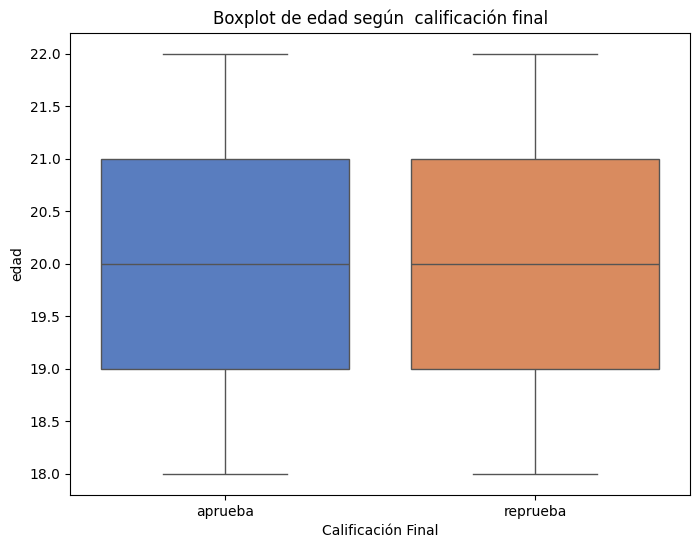

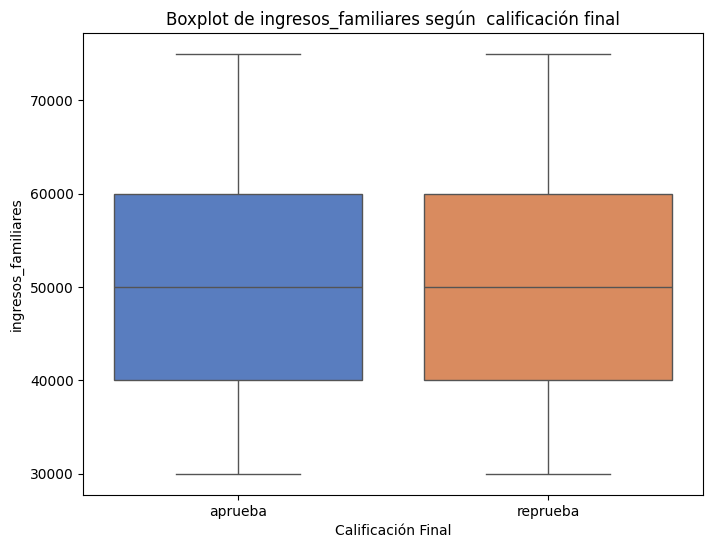

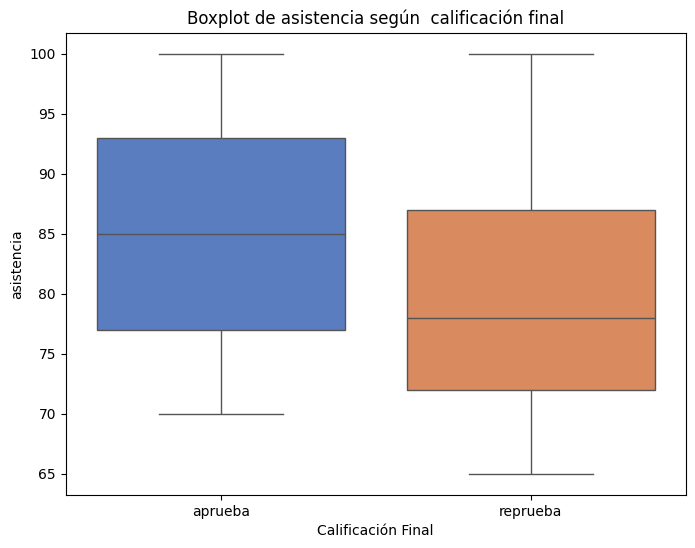

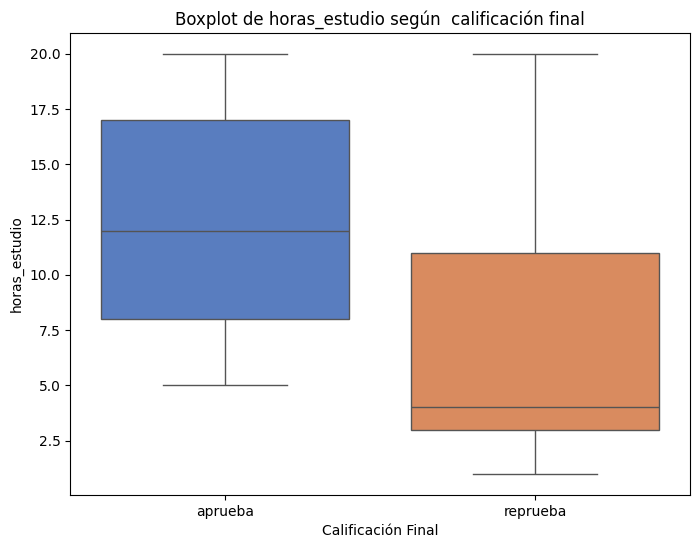

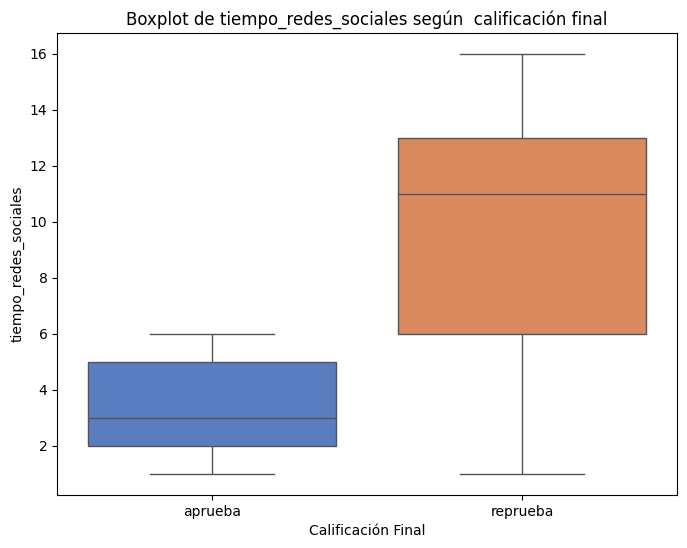

In [ ]:
######### TODO #########
### Utilice diagramas u otro tipo de visualización de cajas para visualizar
# las variables predictoras según la variable target. Deseamos ver cómo se comportan
# las variables predictoras si el estudiante aprueba o reprueba.
import matplotlib.pyplot as plt
X_input = X.columns
for i in X_input:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='calificacion_final', y=i, data=df, palette='muted')
    plt.title(f'Boxplot de {i} según  calificación final')
    plt.ylabel(i)
    plt.xlabel('Calificación Final')
    plt.show()


### **######### Todo #########**
Responder cuáles son las variables que mejor modelan la variable objetivo según su criterio.

RESPUESTA:

* Por lo observado en los gráficos de boxplot la variable que mejor modela sería tiempo_redes_sociales ya que se observa que los valores de la mediana en ambos grupos son muy distintos, la variable de tiempo_redes_sociales ayudaría a discriminar en el modelo las clases (aprueba y reprueba) de la variable califacion_final, la mediana y los valores de tiempo_redes_sociales son mas pequeños en los casos en donde calificación final es igual a aprueba mientras que, los valores de tiempo_redes_sociales y la mediana es mas grande en la clase de reprueba en la calificación final.

* Otras de las variables que ayudarían en el modelo serían Horas_estudio y asistencia, asi mismo se observa que las medianas son distintas en ambos grupos de los que aprueban y reprueban. Se observa que la mediana y los valores en ambas variables son mas altos para la clase de apreba en la calificacion_final y más bajos para la clase de reprueba.

* Las demás variables no contriburían en el modelo ya que las mediana en ambos grupos son similares, a menos que tengan un patrón referente a otra variable de entrada, esto se podría probar viendo las correlaciones entre las variables de entradas.


----

# Parte 1: SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

Entrenaremos un modelo SVM a partir de los datos procesados.

In [ ]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train[['asistencia', 'horas_estudio']], y_train)

SVC(probability=True, random_state=42)

In [ ]:
# Evaluamos el moddelo en el conjunto de validación
y_pred = svm_model.predict(X_val[['asistencia',	'horas_estudio']])
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       360
           1       0.77      0.72      0.74       420

    accuracy                           0.73       780
   macro avg       0.73      0.73      0.73       780
weighted avg       0.74      0.73      0.73       780



Probemos escalando los datos usando `MinMaxScaler`.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[['asistencia', 'horas_estudio']])
X_val_scaled = scaler.transform(X_val[['asistencia', 'horas_estudio']])
svm_model_scaled = SVC(kernel='rbf', probability=True, random_state=42)
svm_model_scaled.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

### **######### Todo #########**
Explique qué hace la celda anterior línea por línea.

- Línea 1: Importa la clase MinMaxScaler del módulo preprocessing de la biblioteca scikit-learn, que se utiliza para normalizar datos.
- Línea 2: Crea una instancia del escalador MinMaxScaler, que transformará los datos para que queden en un rango entre 0 y 1.
- Línea 3: Selecciona solo las columnas 'asistencia' y 'horas_estudio' del conjunto de datos X_train, y aplica la función para escalar los datos del conjunto de entrenamiento que se definió en la linea anterior
- Línea 4: Lo mismo que la línea anterior pero para el conjunto de datos de validación. Selecciona las columnas 'asistencia' y 'horas_estudio' del conjunto de validación X_val y los transforma usando el mismo escalador ya definido.
- Línea 5: Crea un modelo de Máquina de Vectores de Soporte (SVM) para clasificación usando el kernel RBF (Radial Basis Function). Asi mismo, activa el cálculo de probabilidades con probability=True, y luego define la semilla de 42 en el parámetro random_state.
- Línea 6: Entrena el modelo SVM con los datos de entrenamiento normalizados (X_train_scaled) y sus correspondientes etiquetas (y_train).

---

In [ ]:
######### TODO #########
### Realizar la predicción en el conjunto de validación escalado utilizando el nuevo modelo entrenado.
y_pred_scaled = svm_model_scaled.predict(X_val_scaled)

print(classification_report(y_val, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.67      0.89      0.77       360
           1       0.87      0.63      0.73       420

    accuracy                           0.75       780
   macro avg       0.77      0.76      0.75       780
weighted avg       0.78      0.75      0.75       780



### **######### Todo #########**
Interprete los resultados y compare los dos modelos previamente entrenados. ¿Qué modelo es mejor? ¿Por qué?

RESPUESTA:

En cuanto a los dos ultimos modelos entrenados, podemos mencionar que el mejor es el modelo que utilizo valores escalados debido a que las medidas de accuracy, precisión y f1 score  son más altos para la variable de interés.

----

Ahora comparemos varios modelos con varios valores del hiperparámetro `C`.

In [ ]:
svm_models = []
probabilities = []
predictions = []
for c in [0.1, 0.5, 1, 5, 10, 15]:
    model = SVC(kernel='rbf', probability=True, C=c, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    svm_models.append(model)
    # Probabilidades cercanas a 1 indica que es más probable que el estudiante repruebe (la clase "reprueba" es 1)
    probabilities.append(model.predict_proba(X_val_scaled))
    predictions.append(y_pred)
    print('Modelo con C=%s entrenado' % c)

Modelo con C=0.1 entrenado
Modelo con C=0.5 entrenado
Modelo con C=1 entrenado
Modelo con C=5 entrenado
Modelo con C=10 entrenado
Modelo con C=15 entrenado


Para comparar, grafiquemos nuestras curvas ROC para observar el rendimiento de nuestros modelos.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true, probabilities):
    plt.figure()
    for i, prob in enumerate(probabilities):
        fpr, tpr, _ = roc_curve(y_true, prob[:,1]) # Probabilidad de la clase positiva (reprueba) está en la segunda columna
        auc = roc_auc_score(y_true, prob[:,1]) # Probabilidad de la clase positiva (reprueba) está en la segunda columna
        plt.plot(fpr, tpr, label=f'C={svm_models[i].C}, AUC={auc:.4f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

### **######### Todo #########**
Explique qué hacen la segunda y tercera línea dentro del lazo for de la celda anterior.

RESPUESTA:

La segunda linea calcula la curva ROC, el caracter prob[:,1] selecciona la segunda columna de la matriz de probabilidades, que contiene las probabilidades de que cada muestra pertenezca a la clase positiva (en este caso, la clase "reprueba"), luego roc_curve() devuelve tres valores: tasa de falsos positivos (fpr), tasa de verdaderos positivos (tpr).

La tercera linea, adicionalmente, devuelve un valor único que representa el área bajo la curva ROC, es decir el valor de AUC.

---

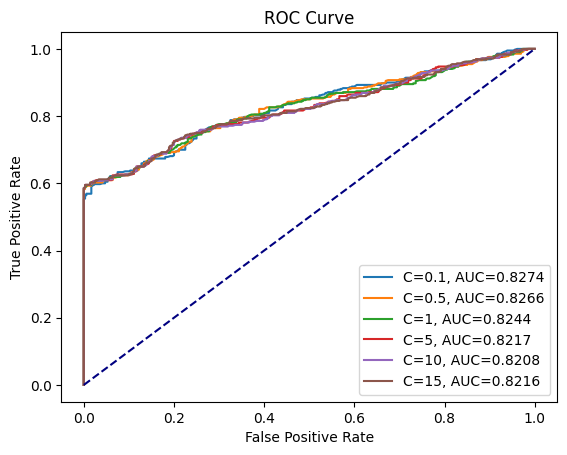

In [ ]:
plot_roc_curve(y_val, probabilities)

### **######### Todo #########**
Responda de acuerdo a las curvas ROC:
* ¿Qué modelo tiene mejor rendimiento?
* ¿Existe alguna relación entre el hiperparámetro C y el rendimiento del modelo?

RESPUESTA:

1. El modelo con mejor rendimiento es el que tiene C=0.1 pues su AUC es 0.8274, lo que indica que tiene una mejor capacidad para discriminar entre las clases positiva y negativa.

2. Sí, a medida que C aumenta, el AUC tiende a disminuir relativamente, como una relación inversa entre el valor de C y el rendimiento del modelo.

---

# Parte 2: Random Forest

Ahora entrenaremos un modelo de Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[['asistencia', 'horas_estudio']], y_train)

RandomForestClassifier(random_state=42)

### **######### ToDo #########**
En la celda anterior hemos utilizado los hiperparámetros por defecto de la clase `RandomForestClassifier`. Responda cuáles son los valores por defecto de los siguientes hiperparámetros:
- `max_depth`
- `n_estimators`
- `min_samples_split`
- `criterion`


Puede revisar la documentación https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Los valores por defectos de los hiperparámetros mencionados son:

* max_depth: hace referencia a la profundidad de los árboles, el valor por defecto es None ya que este valor permite que se expandan hasta que las hojas o nodos de los árboles sean puras.

* n_estimators: por defecto es 100, hace referencia a la cantidad de árboles en el modelo.

* min_samples_split: por defecto es 2, se refiere al número mínimo de muestras para dividir un nodo.

* criterion: gini, ya que usa como criterio la impureza o índice de gini.

In [ ]:
y_pred_rf = rf_model.predict(X_val[['asistencia', 'horas_estudio']])
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.68      0.75      0.72       360
           1       0.77      0.70      0.73       420

    accuracy                           0.73       780
   macro avg       0.73      0.73      0.73       780
weighted avg       0.73      0.73      0.73       780



### **######### Todo #########**
Interprete los resultados y compare el modelo de Random Forest con el primer modelo SVM que entrenamos.

Los resultados obtenidos son bastantes similares entre los dos modelos se observa que en la clase de interes las métricas por la diferencia minima fue mejor en el modelo de Máquina de Soporte Vectorial.

### **######### ToDo #########**
En esta parte del laboratorio entrenaremos varios modelos basados en Random Forest. Similar a la parte 1 de este laboratorio, entrene varios modelos y visualice las curvas ROC para compararlos. En particular:
* Visualice las curvas ROC de 5 modelos con diferentes valores de `max_depth` (considere valores entre 3 y 12). Puede utilizar la función `plot_roc_curve` para visualizar las curvas ROC. Considere 1000 estimadores para todos los modelos a entrenar.
* ¿Qué modelo tiene mejor rendimiento?
* ¿Existe alguna relación entre el hiperparámetro `max_depth` y el rendimiento del modelo?
* ¿Existe alguna relación entre el hiperparámetro `max_depth` y la velocidad de entrenamiento del modelo (es decir el tiempo que a su computadora le tomó ejecutar el método `fit`)?

In [ ]:
import time
rf_models = []
probabilities = []
predictions = []
for c in [3, 5, 7, 9, 12]:
    start_time = time.time()
    model = RandomForestClassifier(  max_depth=c, n_estimators=1000,  random_state=42)
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    elapsed_time = round(end_time - start_time, 2)
    y_pred = model.predict(X_val_scaled)
    rf_models.append(model)
    # Probabilidades cercanas a 1 indica que es más probable que el estudiante repruebe (la clase "reprueba" es 1)
    probabilities.append(model.predict_proba(X_val_scaled))
    predictions.append(y_pred)
    print(f'Modelo con max_depth={c} entrenado en {elapsed_time} segundos')

Modelo con max_depth=3 entrenado en 1.99 segundos
Modelo con max_depth=5 entrenado en 2.09 segundos
Modelo con max_depth=7 entrenado en 2.2 segundos
Modelo con max_depth=9 entrenado en 2.37 segundos
Modelo con max_depth=12 entrenado en 3.56 segundos


In [ ]:

def plot_roc_curve(y_true, probabilities):
    plt.figure()
    for i, prob in enumerate(probabilities):
        fpr, tpr, _ = roc_curve(y_true, prob[:,1]) # Probabilidad de la clase positiva (reprueba) está en la segunda columna
        auc = roc_auc_score(y_true, prob[:,1]) # Probabilidad de la clase positiva (reprueba) está en la segunda columna
        plt.plot(fpr, tpr, label=f'max_depth={rf_models[i].max_depth}, AUC={auc:.4f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

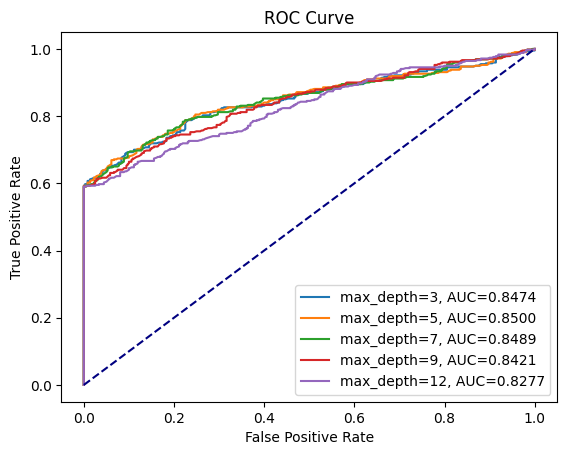

In [ ]:
plot_roc_curve(y_val, probabilities)

¿Qué modelo tiene mejor rendimiento?

* El modelo entrenado con una profundidad máxima de 5 obtuvo el valor del área bajo la curva más alto el cual fue de 0.85

¿Existe alguna relación entre el hiperparámetro max_depth y el rendimiento del modelo?

* En este ejemplo se visualiza que a mayor valor en la profundidad de los árboñes el valor del area bajo la curva disminuye,  por los resultados obtenidos se observa que la relación entre el hiperparámetro max_depth y el rendimiento del modelo es inversa.

¿Existe alguna relación entre el hiperparámetro max_depth y la velocidad de entrenamiento del modelo (es decir el tiempo que a su computadora le tomó ejecutar el método fit)?

* Existe una relación directa o positiva en cuanto al hiperparámetro max_depth y la velocidad del entrenamiento, ya que a un mayor valor en max_depth tambíen aumenta el tiempo de ejecución del modelo.  

# Parte 3: XGBoost

In [ ]:
# Ya que scikit-learn no integra XGBoost, es necesario instalarlo:
!pip install xgboost

In [ ]:
# Ahora la es posible importar la clase del clasificador XGBoost
from xgboost import XGBClassifier

In [ ]:
######### TODO #########
### Instancie un objeto de la clase XGBClassifier usando un valor de random_state
# y los demás hiperparámetros por defecto.

xgb_model = XGBClassifier(random_state=42)

In [ ]:
xgb_model.fit(X_train[['asistencia', 'horas_estudio']], y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_val[['asistencia', 'horas_estudio']])
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       360
           1       0.81      0.70      0.75       420

    accuracy                           0.75       780
   macro avg       0.75      0.75      0.75       780
weighted avg       0.76      0.75      0.75       780



### **######### ToDo OPCIONAL #########**
Interprete los resultados y compare el modelo de XGBoost con los primeros modelos que entrenamos de SVM y Random Forest.

En comparación con los primeros modelos de Random Forest y Máquinas de Soporte Vectorial el modelo de XGBoost obtuvo mejores métricas de precision, acuraccy y f1 score para la clase de interés.

### **######### ToDo OPCIONAL #########**
Es importante en ocasiones hacer análisis detallados de los errores de los modelos que creamos. Utilice la función `confusion_matrix` ((https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)) para responder las siguientes preguntas sobre las predicciones de nuestro modelo de XGBoost previamente entrenado:

- ¿Cuántos falsos positivos muestra nuestro modelo?
- ¿Cuántos falsos negativos muestra nuestro modelo?



In [ ]:
cm = confusion_matrix(y_val, y_pred_xgb)
cm

array([[293,  67],
       [128, 292]])

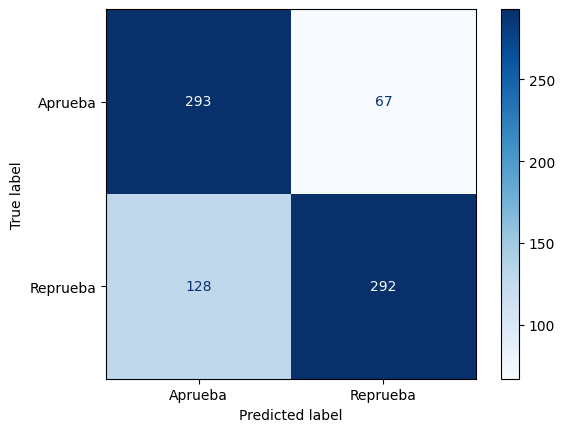

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Aprueba", "Reprueba"])
disp.plot(cmap="Blues")

- ¿Cuántos falsos positivos muestra nuestro modelo?
   * Tiene 67 falsos positivos
- ¿Cuántos falsos negativos muestra nuestro modelo?
  * Tiene 128 falsos negativos

### **######### Todo OPCIONAL #########**
En esta parte del laboratorio entrenaremos varios modelos basados en XGBoost. Similar a la parte 1 y 2 de este laboratorio, entrene varios modelos y visualice las curvas ROC para compararlos. En particular:
* Visualice las curvas ROC de 5 modelos con diferentes valores de `max_depth` (considere valores entre 3 y 12). Puede utilizar la función `plot_roc_curve` para visualizar las curvas ROC. Considere 1000 estimadores para todos los modelos a entrenar.
* ¿Qué modelo tiene mejor rendimiento?
* ¿Existe alguna relación entre el hiperparámetro `max_depth` y el rendimiento del modelo?
* ¿Existe alguna relación entre el hiperparámetro `max_depth` y la velocidad de entrenamiento del modelo (es decir el tiempo que a su computadora le tomó ejecutar el método `fit`)?
* Con base a las tres partes del laboratorio, ¿qué modelo elegiría para predecir si un estudiante reprobará un curso?

In [ ]:
gb_models = []
probabilities = []
predictions = []
for c in [3, 5, 7, 9, 12]:
    start_time = time.time()
    model = XGBClassifier(  max_depth=c, n_estimators=1000,  random_state=42)
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    elapsed_time = round(end_time - start_time, 2)
    y_pred = model.predict(X_val_scaled)
    gb_models.append(model)
    # Probabilidades cercanas a 1 indica que es más probable que el estudiante repruebe (la clase "reprueba" es 1)
    probabilities.append(model.predict_proba(X_val_scaled))
    predictions.append(y_pred)
    print(f'Modelo con max_depth={c} entrenado en {elapsed_time} segundos')

Modelo con max_depth=3 entrenado en 0.33 segundos
Modelo con max_depth=5 entrenado en 0.4 segundos
Modelo con max_depth=7 entrenado en 0.59 segundos
Modelo con max_depth=9 entrenado en 0.72 segundos
Modelo con max_depth=12 entrenado en 0.93 segundos


In [ ]:
def plot_roc_curve(y_true, probabilities):
    plt.figure()
    for i, prob in enumerate(probabilities):
        fpr, tpr, _ = roc_curve(y_true, prob[:,1]) # Probabilidad de la clase positiva (reprueba) está en la segunda columna
        auc = roc_auc_score(y_true, prob[:,1]) # Probabilidad de la clase positiva (reprueba) está en la segunda columna
        plt.plot(fpr, tpr, label=f'max_depth={gb_models[i].max_depth}, AUC={auc:.4f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

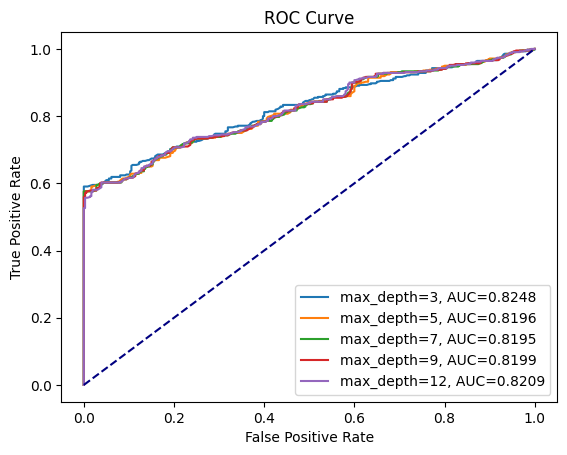

In [ ]:
plot_roc_curve(y_val, probabilities)

¿Qué modelo tiene mejor rendimiento?

* El modelo entrenado con una profundidad máxima de 3 obtuvo el valor del área bajo la curva más alto el cual fue de 0.8248

¿Existe alguna relación entre el hiperparámetro max_depth y el rendimiento del modelo?

* En este ejemplo se visualiza que a mayor valor en la profundidad de los árboñes el valor del area bajo la curva disminuye hasta el valor en max_depth de 7 luego de ese valor, el área bajo la curva aumenta. No se visualiza una clara relación entre ambos, ya que la relación cambia en un determinado valor de max_depth.

¿Existe alguna relación entre el hiperparámetro max_depth y la velocidad de entrenamiento del modelo (es decir el tiempo que a su computadora le tomó ejecutar el método fit)?

* Existe una relación directa o positiva en cuanto al hiperparámetro max_depth y la velocidad del entrenamiento, ya que a un mayor valor en max_depth tambíen aumenta el tiempo de ejecución del modelo.  



In [ ]:
rf_model2 = RandomForestClassifier(random_state=42, n_estimators=1000 , max_depth= 5)
rf_model2.fit(X_train_scaled, y_train)
y_pred_rf_scal = rf_model2.predict(X_val_scaled)
print(classification_report(y_val, y_pred_rf_scal))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       360
           1       1.00      0.59      0.74       420

    accuracy                           0.78       780
   macro avg       0.84      0.80      0.77       780
weighted avg       0.85      0.78      0.77       780



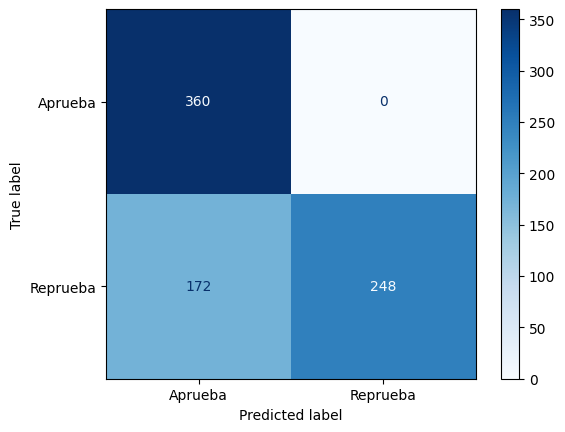

In [ ]:
cm2 = confusion_matrix(y_val, y_pred_rf_scal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Aprueba", "Reprueba"])
disp.plot(cmap="Blues")

 Con base a las tres partes del laboratorio, ¿qué modelo elegiría para predecir si un estudiante reprobará un curso?

 * Cabe mencionar que cuando se han ejecutado los modelos con varios valores en los hiperparámetros definidos tanto en SVM, RF y XGBoost, se ha utilizado en dichos modelos los datos escalados.
 * De los modelos iniciales  e individuales que se ejecutaron con los valores por defectos  el que daba los mejores resultados era el de SVM con datos escalados, Sin embargo una vez que se compararon los modelos para cada algoritmo y con distintos valores en los hiperparámetros se obtuvo que el modelo de Random Forest con max_depth de 5 obtuvo el AUC más alto. En base a este resultado  en las dos chunk de código anteriores se entrena el modelo de RandomForest para los datos escalados con el valor de 5 en max_depth para obtener las demás métricas de evaluación y se concluye que el mejor modelo con las mejores métricas es el modelo de Random Forest con un max_depth de 5.
